In [1]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors")

Skipping, found downloaded files in "./rockpaperscissors" (use force=True to force download)


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# extract zip file
import zipfile
import os
# local_zip = '/tmp/rockpaperscissors.zip'
base_dir = '/content/rockpaperscissors/rps-cv-images'
# zip_extract = zipfile.ZipFile(local_zip, 'r')
# zip_extract.extractall('/tmp')
# zip_extract.close()

In [5]:
# image augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.4
)

validation_datagen = ImageDataGenerator(
      rescale = 1.0/255,
      validation_split=0.4)

In [6]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [12]:
# count loss function and optimizer
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']               
)

In [13]:
# callbacks
accuracy_threshold = 98e-2
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'training has been stopped.')
            self.model.stop_training = True

In [14]:
# train data
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
)

Epoch 1/20
25/25 - 6s - loss: 1.1206 - accuracy: 0.3675 - val_loss: 0.9921 - val_accuracy: 0.7000 - 6s/epoch - 252ms/step
Epoch 2/20
25/25 - 5s - loss: 0.6999 - accuracy: 0.7038 - val_loss: 0.3143 - val_accuracy: 0.9000 - 5s/epoch - 186ms/step
Epoch 3/20
25/25 - 4s - loss: 0.2825 - accuracy: 0.9052 - val_loss: 0.2608 - val_accuracy: 0.9125 - 4s/epoch - 178ms/step
Epoch 4/20
25/25 - 4s - loss: 0.2613 - accuracy: 0.8987 - val_loss: 0.1804 - val_accuracy: 0.9500 - 4s/epoch - 178ms/step
Epoch 5/20
25/25 - 4s - loss: 0.1906 - accuracy: 0.9403 - val_loss: 0.1790 - val_accuracy: 0.9375 - 4s/epoch - 179ms/step
Epoch 6/20
25/25 - 4s - loss: 0.1717 - accuracy: 0.9416 - val_loss: 0.1891 - val_accuracy: 0.9438 - 4s/epoch - 180ms/step
Epoch 7/20
25/25 - 5s - loss: 0.2167 - accuracy: 0.9312 - val_loss: 0.1368 - val_accuracy: 0.9625 - 5s/epoch - 181ms/step
Epoch 8/20
25/25 - 4s - loss: 0.1597 - accuracy: 0.9442 - val_loss: 0.2074 - val_accuracy: 0.9625 - 4s/epoch - 179ms/step
Epoch 9/20
25/25 - 4s - 

1/1 [==============================] - 0s 28ms/step
/content/rockpaperscissors/rock/Lz2cVZ7LSaoXHcgr.png
rock


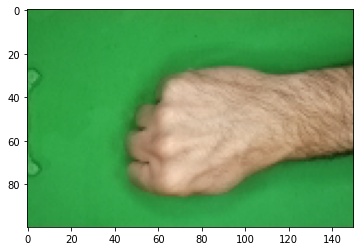

In [27]:
import numpy as np
from google.colab import files
import keras.utils as image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# predict images
path = "/content/rockpaperscissors/rock/Lz2cVZ7LSaoXHcgr.png"
img_source = image.load_img(path, target_size = (100, 150))
imgplot = plt.imshow(img_source)
x = image.img_to_array(img_source)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])
classes = model.predict(images, batch_size = 10)

print(path)
if classes[0, 0] == 1:
  print('paper')
elif classes[0, 1] == 1:
  print('rock')
elif classes[0, 2] == 1:
  print('scissors')